In [118]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

def f1(x):
    Q = np.array([[48, 12], [8, 8]])
    q = np.array([[13], [23]])
    p = 4
    f1_x = 0.5 * np.matmul(np.transpose(x), np.matmul(Q, x)) + np.matmul(np.transpose(q), x) + p
    return f1_x

# Initial parameters
x0_1 = np.array([23, 37])
Q = np.array([[48, 12], [8, 8]])

def f2(x):
    n = len(x)
    a = -2
    b = 150
    result = 0
    for i in range(n-1):
        term1 = b * (x[i+1]**2 - x[i])**2
        term2 = (x[i] - a)**2
        result += term1 + term2
    return result
#initial parameters

x0_2 = np.array([1, 2])


def gradient(f, x, input_size):
    h = 1e-10
    grad = np.zeros((input_size, 1))
    for i in range(input_size):
        delta = np.zeros((input_size, 1))
        delta[i][0] = h
        grad[i][0] = (f(x + delta) - f(x)) / h
    return grad



def steepset_descent(f , x0,max_iter, tol ,Q):
    x = x0.reshape(-1, 1)
    input_size = len(x)
    val = np.zeros(max_iter)
    val[0] = f(x)

    x_history = [x.flatten()]

    print("Steepset Descent")
    print("Iteration\tX Value\t\t\t\tFunction Value")
    print(f"0\t\t{x.flatten()}\t\t{val[0]}")

    for k in range(1, max_iter):
        # Using a constant step norm (gama)
        grad = gradient(f , x , input_size)
        step = (np.transpose(grad) @ grad)/(np.transpose(grad) @ Q @ grad)
        x = x - step * gradient(f, x, input_size)
        val[k] = f(x)

        x_history.append(x.flatten())

        print(f"{k}\t\t{x.flatten()}\t{val[k]}")

        # Check for convergence
        if np.linalg.norm(gradient(f, x, input_size)) < tol:
            break

    return x, val[:k+1], np.array(x_history)



def gradient_descent_constant(f , x0,max_iter, tol,c):
    x = x0.reshape(-1, 1)
    input_size = len(x)
    val = np.zeros(max_iter)
    val[0] = f(x)

    x_history = [x.flatten()]

    print("CONSTANT GAMA STEP SIZE")
    print("Iteration\tX Value\t\t\t\tFunction Value")
    print(f"0\t\t{x.flatten()}\t\t{val[0]}")

    for k in range(1, max_iter):
        # Using a constant step norm (gama)
        step = c /np.linalg.norm(gradient(f, x, input_size))
        x = x - step * gradient(f, x, input_size)
        val[k] = f(x)

        x_history.append(x.flatten())

        print(f"{k}\t\t{x.flatten()}\t{val[k]}")

        # Check for convergence
        if np.linalg.norm(gradient(f, x, input_size)) < tol:
            break

    return x, val[:k+1], np.array(x_history)

def gradient_descent_alpha(f , x0,max_iter, tol,c):
    x = x0.reshape(-1, 1)
    input_size = len(x)
    val = np.zeros(max_iter)
    val[0] = f(x)

    x_history = [x.flatten()]
    print("CONSTANT ALPHA STEP SIZE")
    print("Iteration\tX Value\t\t\t\tFunction Value")
    print(f"0\t\t{x.flatten()}\t\t{val[0]}")

    for k in range(1, max_iter):
        # Using a constant step size (alpha)
        step = c
        x = x - step * gradient(f, x, input_size)
        val[k] = f(x)

        x_history.append(x.flatten())

        print(f"{k}\t\t{x.flatten()}\t{val[k]}")

        # Check for convergence
        if np.linalg.norm(gradient(f, x, input_size)) < tol:
            break

    return x, val[:k+1], np.array(x_history)


def hessian(f, x, input_size, reg=1e-6):
    h = 1e-5
    hess = np.zeros((input_size, input_size))
    for i in range(input_size):
        for j in range(input_size):
            x_plus_h1 = x.copy()
            x_plus_h2 = x.copy()
            x_plus_h1[i, 0] += h
            x_plus_h2[j, 0] += h
            hess[i, j] = (f(x_plus_h1) - 2 * f(x) + f(x_plus_h2)) / (h ** 2)
    
    # Regularization
    hess_reg = hess + np.eye(hess.shape[0]) * reg
    return hess_reg


def newton_method(f, x0, max_iter, tol):
    x = x0.reshape(-1, 1)
    input_size = len(x)
    val = np.zeros(max_iter)
    val[0] = f(x)

    x_history = [x.flatten()]
    print("NEWTON'S METHOD WITH HESSIAN")
    print("Iteration\tX Value\t\t\t\tFunction Value")
    print(f"0\t\t{x.flatten()}\t\t{val[0]}")

    for k in range(1, max_iter):
        # Calculate the Newton step
        grad = gradient(f, x, input_size)
        hess = hessian(f, x, input_size, reg=1e-6)
        # Use step size as the inverse of Hessian times the transposed gradient
        step_size = 1.0 / np.matmul(grad.T, np.linalg.solve(hess, grad))[0, 0]

        # Update x using the Newton step and the step size
        x = x - step_size * np.linalg.solve(hess, grad)

        val[k] = f(x)
        x_history.append(x.flatten())

        print(f"{k}\t\t{x.flatten()}\t{val[k]}")

        # Check for convergence
        if np.linalg.norm(grad) < tol:
            break

    return x, val[:k+1], np.array(x_history)


def back_track(f , x0,max_iter, tol, a, b, t):
    x = x0.reshape(-1, 1)
    input_size = len(x)
    val = np.zeros(max_iter)
    val[0] = f(x)

    x_history = [x.flatten()]
    print("backtracking")
    print("Iteration\tX Value\t\t\t\tFunction Value")
    print(f"0\t\t{x.flatten()}\t\t{val[0]}")

    for k in range(1, max_iter):
        # Using a constant step size (alpha)
        grad = gradient(f, x, input_size)
        if(val[k] > val[k-1] - a*t* np.linalg.norm(grad)):
            step = t
            x = x - step * gradient(f, x, input_size)
            val[k] = f(x)

        x_history.append(x.flatten())

        print(f"{k}\t\t{x.flatten()}\t{val[k]}")

        # Check for convergence
        if np.linalg.norm(gradient(f, x, input_size)) < tol:
            break

    return x, val[:k+1], np.array(x_history)

CONSTANT GAMA STEP SIZE
Iteration	X Value				Function Value
0		[23 37]		27836.0
1		[22.06190674 36.65361722]	26275.740944887544
2		[21.12502465 36.30397175]	24765.153106212376
3		[20.18945941 35.95081785]	23304.19528369194
4		[19.25530596 35.59394625]	21892.82241787685
5		[18.32266608 35.23313764]	20530.98515141499
6		[17.39167402 34.86809821]	19218.62889667043
7		[16.46248204 34.49850078]	17955.693060760015
8		[15.53522608 34.12407271]	16742.110788504982
9		[14.61008859 33.74444047]	15577.80751017587
10		[13.68727679 33.35918941]	14462.699720893212
11		[12.76702079 32.96787253]	13396.693636708453
12		[11.84958904 32.56997937]	12379.683359822158
13		[10.93531634 32.16488008]	11411.54822539635
14		[10.02454304 31.75197332]	10492.151029378685
15		[ 9.11770269 31.33049902]	9621.334095940996
16		[ 8.21530974 30.89958491]	8798.915020183636
17		[ 7.31798493 30.45821412]	8024.681158231023
18		[ 6.42645913 30.00524419]	7298.38310380732
19		[ 5.54164569 29.53929872]	6619.725304324974
20		[ 4.66

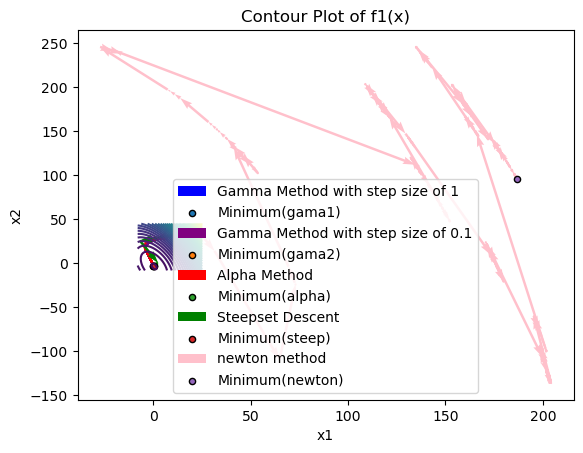

the minimum value with the constant gama method is:
-32.55274329108335
constant gama iteration count 1000
the minimum value with the constant alpha method is:
-32.55633802737127
constant alpha iteration count 253
the minimum value with the Steepset Descent method is:
-32.55633802816514
Steep set descent iteration count 24
the minimum value with the newton's method is:
27834.999990500153
newton's iteration count 24


In [119]:

#########
# should be fixed
#########


def plot_contour(Q, q, p, x_vals, y_vals, levels=None):
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = 0.5 * (Q[0, 0] * X**2 + (Q[1, 0] + Q[0, 1]) * X * Y + Q[1, 1] * Y**2) + q[0] * X + q[1] * Y + p

    plt.contour(X, Y, Z, levels=levels)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Contour Plot of f1(x)')



# Define range for contour plot
x_v = np.linspace(-8, 25, 100)
y_v = np.linspace(-8, 45, 100)
gama1=1
gama2 = 0.1
alpha = 0.01

plot_contour(Q, np.array([[13], [23]]), 4, x_v, y_v, levels=50)


minimizer_f1_gama, values_f1_gama, x_history_f1_gama = gradient_descent_constant(f1 ,x0_1, 1000, 1e-10,gama1)
minimizer_f1_gama2, values_f1_gama2, x_history_f1_gama2 = gradient_descent_constant(f1 ,x0_1, 1000, 1e-10,gama2)
plt.quiver(x_history_f1_gama[:-1, 0], x_history_f1_gama[:-1, 1], x_history_f1_gama[1:, 0] - x_history_f1_gama[:-1, 0], x_history_f1_gama[1:, 1] - x_history_f1_gama[:-1, 1],
           scale_units='xy', angles='xy', scale=1, color='blue', width=0.005, headwidth=4, label='Gamma Method with step size of 1')
plt.scatter(minimizer_f1_gama[0], minimizer_f1_gama[1], s=20, label='Minimum(gama1)', edgecolors='black')


plt.quiver(x_history_f1_gama2[:-1, 0], x_history_f1_gama2[:-1, 1], x_history_f1_gama2[1:, 0] - x_history_f1_gama2[:-1, 0], x_history_f1_gama2[1:, 1] - x_history_f1_gama2[:-1, 1],
           scale_units='xy', angles='xy', scale=1, color='purple', width=0.005, headwidth=2, label='Gamma Method with step size of 0.1')
plt.scatter(minimizer_f1_gama[0], minimizer_f1_gama[1], s=20, label='Minimum(gama2)', edgecolors='black')


minimizer_f1_alpha, values_f1_alpha, x_history_f1_alpha = gradient_descent_alpha(f1, x0_1, 1000, 1e-10, alpha)
plt.quiver(x_history_f1_alpha[:-1, 0], x_history_f1_alpha[:-1, 1], x_history_f1_alpha[1:, 0] - x_history_f1_alpha[:-1, 0], x_history_f1_alpha[1:, 1] - x_history_f1_alpha[:-1, 1],
           scale_units='xy', angles='xy', scale=1, color='red', width=0.005, headwidth=4, label='Alpha Method')
plt.scatter(minimizer_f1_alpha[0], minimizer_f1_alpha[1], s=20, label='Minimum(alpha)', edgecolors='black')

minimizer_f1_steep, values_f1_steep, x_history_f1_steep = steepset_descent(f1, x0_1, 1000, 1e-10, Q)
plt.quiver(x_history_f1_steep[:-1, 0], x_history_f1_steep[:-1, 1], x_history_f1_steep[1:, 0] - x_history_f1_steep[:-1, 0], x_history_f1_steep[1:, 1] - x_history_f1_steep[:-1, 1],
           scale_units='xy', angles='xy', scale=1, color='green', width=0.005, headwidth=3, label='Steepset Descent')
plt.scatter(minimizer_f1_steep[0], minimizer_f1_steep[1], s=20, label='Minimum(steep)', edgecolors='black')

minimizer_f1_new, values_f1_new, x_history_f1_new = newton_method(f1, x0_1, 1000, 1e-10)
plt.quiver(x_history_f1_new[:-1, 0], x_history_f1_new[:-1, 1], x_history_f1_new[1:, 0] - x_history_f1_new[:-1, 0], x_history_f1_new[1:, 1] - x_history_f1_new[:-1, 1],
           scale_units='xy', angles='xy', scale=1, color='pink', width=0.005, headwidth=3, label='newton method')
plt.scatter(minimizer_f1_new[0], minimizer_f1_new[1], s=20, label='Minimum(newton)', edgecolors='black')



plt.legend()

plt.show()

print("the minimum value with the constant gama method is:")
print(np.min(values_f1_gama))
print("constant gama iteration count" , len(x_history_f1_gama))

print("the minimum value with the constant alpha method is:")
print(np.min(values_f1_alpha))
print("constant alpha iteration count" , len(x_history_f1_alpha))

print("the minimum value with the Steepset Descent method is:")
print(np.min(values_f1_steep))
print("Steep set descent iteration count"  , len(x_history_f1_steep))

print("the minimum value with the newton's method is:")
print(np.min(values_f1_new))
print("newton's iteration count"  , len(x_history_f1_steep))

CONSTANT GAMA STEP SIZE
Iteration	X Value				Function Value
0		[1 2]		1359.0
1		[1.12050635 1.51473902]	216.4535833824123
2		[1.27472263 1.03911591]	16.42526235490968
3		[1.03883591 1.47997582]	208.12477325388807
4		[1.19633721 1.00543041]	15.375154192675339
5		[0.95388797 1.44271564]	199.4275690170655
6		[1.11505786 0.96940362]	14.313860867427529
7		[0.86521118 1.4025048 ]	190.30674489950218
8		[1.03052293 0.93062343]	13.241278555849622
9		[0.77224472 1.35875002]	180.69284799351286
10		[0.94229211 0.88855443]	12.157568930662894
11		[0.67427452 1.31065226]	170.49648069143907
12		[0.84982455 0.84248328]	11.063451954238488
13		[0.57037408 1.2571005 ]	159.59988122312194
14		[0.75244763 0.79142977]	9.960640283703055
15		[0.45930645 1.19648317]	147.84322396117628
16		[0.64931746 0.73399445]	8.852728856165882
17		[0.33936374 1.12633192]	135.00120247753904
18		[0.53937646 0.6680799 ]	7.747058305739863
19		[0.20809635 1.04258422]	120.74165138715851
20		[0.42134901 0.5903417 ]	6.658905289875816

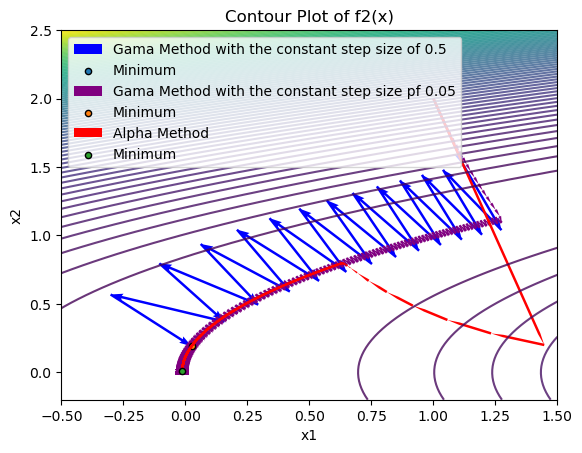

the minimum value with the constant gama method is:
4.119620172040207
constant gama iteration count 27
the minimum value with the constant alpha method is:
3.9741389160835734
constant alpha iteration count 1301
the minimum value with the newton's method is:
1358.000247021436
newton's iteration count 2000


In [120]:
def plot_contour(a, b, x_vals, y_vals, levels=None):
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = np.zeros_like(X)

    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            x = np.array([X[i, j], Y[i, j]])
            Z[i, j] = f2(x)

    plt.contour(X, Y, Z, levels=levels, cmap='viridis', alpha=0.8)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Contour Plot of f2(x)')

# Example usage:
a_value = 2
b_value = 150
c = 0.5
gama2 = 0.05
alpha = 0.0005
x_vals = np.linspace(-0.5, 1.5, 100)
y_vals = np.linspace(-0.2, 2.5, 100)

plot_contour(a_value, b_value, x_vals, y_vals, levels=100)
minimizer_f2_gama, values_f2_gama, x_history_f2_gama = gradient_descent_constant(f2 ,x0_2, 2000, 5,c)
minimizer_f2_gama2, values_f2_gama2, x_history_f2_gama2 = gradient_descent_constant(f2 ,x0_2, 2000, 5,gama2)


plt.quiver(x_history_f2_gama[:-1, 0], x_history_f2_gama[:-1, 1], x_history_f2_gama[1:, 0] - x_history_f2_gama[:-1, 0], x_history_f2_gama[1:, 1] - x_history_f2_gama[:-1, 1],
           scale_units='xy', angles='xy', scale=1, color='blue', width=0.005, headwidth=3, label='Gama Method with the constant step size of 0.5')
plt.scatter(minimizer_f2_gama[0], minimizer_f2_gama[1], s=20, label='Minimum', edgecolors='black')

plt.quiver(x_history_f2_gama2[:-1, 0], x_history_f2_gama2[:-1, 1], x_history_f2_gama2[1:, 0] - x_history_f2_gama2[:-1, 0], x_history_f2_gama2[1:, 1] - x_history_f2_gama2[:-1, 1],
           scale_units='xy', angles='xy', scale=1, color='purple', width=0.005, headwidth=2, label='Gama Method with the constant step size pf 0.05')
plt.scatter(minimizer_f2_gama[0], minimizer_f2_gama[1], s=20, label='Minimum', edgecolors='black')

minimizer_f2_alpha, values_f2_alpha, x_history_f2_alpha = gradient_descent_alpha(f2, x0_2, 2000, 0.1, alpha)
plt.quiver(x_history_f2_alpha[:-1, 0], x_history_f2_alpha[:-1, 1], x_history_f2_alpha[1:, 0] - x_history_f2_alpha[:-1, 0], x_history_f2_alpha[1:, 1] - x_history_f2_alpha[:-1, 1],
           scale_units='xy', angles='xy', scale=1, color='red', width=0.005, headwidth=1, label='Alpha Method')
plt.scatter(minimizer_f2_alpha[0], minimizer_f2_alpha[1], s=20, label='Minimum', edgecolors='black')

minimizer_f2_new, values_f2_new, x_history_f2_new = newton_method(f2, x0_2, 2000, 0.1)
# plt.quiver(x_history_f2_new[:-1, 0], x_history_f2_new[:-1, 1], x_history_f2_new[1:, 0] - x_history_f2_new[:-1, 0], x_history_f2_new[1:, 1] - x_history_f2_new[:-1, 1],
#            scale_units='xy', angles='xy', scale=1, color='pink', width=0.005, headwidth=1, label='Newton Method')
# plt.scatter(minimizer_f2_alpha[0], minimizer_f2_alpha[1], s=20, label='Minimum', edgecolors='black')



plt.legend()

plt.show()

print("the minimum value with the constant gama method is:")
print(np.min(values_f2_gama))
print("constant gama iteration count" , len(x_history_f2_gama))

print("the minimum value with the constant alpha method is:")
print(np.min(values_f2_alpha))
print("constant alpha iteration count" , len(x_history_f2_alpha))

print("the minimum value with the newton's method is:")
print(np.min(values_f2_new))
print("newton's iteration count"  , len(x_history_f2_new))

In [121]:
def gradient_descent_opt(f , x0,max_iter, tol,c):
    x = x0.reshape(-1, 1)
    input_size = len(x)
    val = np.zeros(max_iter)
    val[0] = f(x)

    x_history = [x.flatten()]

    print("Iteration\tX Value\t\t\t\tFunction Value")
    print(f"0\t\t{x.flatten()}\t\t{val[0]}")

    for k in range(1, max_iter):
        # Using a constant step size (alpha)
        step = c /np.linalg.norm(gradient(f, x, input_size))
        x = x - step * gradient(f, x, input_size)
        val[k] = f(x)

        x_history.append(x.flatten())

        print(f"{k}\t\t{x.flatten()}\t{val[k]}")

        # Check for convergence
        if np.linalg.norm(gradient(f, x, input_size)) < tol:
            break

    return x, val[:k+1], np.array(x_history)

In [32]:
x = x0_1.reshape(-1, 1)
grad =sp.hessian(f1 , []])

AttributeError: 'function' object has no attribute 'diff'